In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
fear_greed_index_data_path = "/content/drive/MyDrive/ds_harsh_makadiya/csv_files/fear_greed_index.csv"
historical_data_path = "/content/drive/MyDrive/ds_harsh_makadiya/csv_files/historical_data.csv"

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading Datasets
df1=pd.read_csv(fear_greed_index_data_path)
df2=pd.read_csv(historical_data_path)

lets take an overviwew of datasets

In [5]:
print("Fear_greed_index Data:")
df1.head()

Fear_greed_index Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
df1.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [8]:
# droping off the ducpilcate if any
df1 = df1.drop_duplicates()

In [9]:
df1['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [10]:
print("Historical Data:")
df2.head()

Historical Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
df2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [13]:
# droping off the ducpilcate if any
df2 = df2.drop_duplicates()

In [14]:
#droping NaN values from numerical columns
numerical_cols = ['Execution Price', 'Size USD', 'Size Tokens', 'Fee', 'Closed PnL']
for col in numerical_cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
df2 = df2.dropna(subset=numerical_cols)

In [15]:
#Now we will Standardize date columns
df1["date"] = pd.to_datetime(df1["date"])
df2["Timestamp"] = pd.to_datetime(df2["Timestamp IST"], errors="coerce")

In [16]:
df2['date'] = pd.to_datetime(df2['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date

In [17]:
# 🔹 Aggregate trading data by date to compute daily metrics:
#    - mean execution price
#    - total USD and token volume
#    - average fee
#    - total daily profit/loss
#    - buy ratio (fraction of trades that were BUY)
#    - crossed ratio (fraction of trades that were crossed)

daily_summary = df2.groupby('date').agg({
    'Execution Price': 'mean',
    'Size USD': 'sum',
    'Size Tokens': 'sum',
    'Fee': 'mean',
    'Closed PnL': 'sum',
    'Side': lambda x: (x == "BUY").mean(),
    'Crossed': 'mean'
}).reset_index()

# 🔹 Rename columns to more descriptive names
daily_summary.rename(columns={
    'Execution Price': 'mean_exec_price',
    'Size USD': 'total_usd',
    'Size Tokens': 'total_tokens',
    'Fee': 'avg_fee',
    'Closed PnL': 'total_pnl',
    'Side': 'buy_ratio',
    'Crossed': 'crossed_ratio'
}, inplace=True)


In [18]:
# Ensure 'date' column in daily_summary is datetime objects
daily_summary['date'] = pd.to_datetime(daily_summary['date'])

# Merge market sentiment (df1) with daily trading summary (daily_summary) on 'date'
# This combines sentiment classification (Fear/Greed) with aggregated daily trading metrics
df3 = pd.merge(df1, daily_summary, on="date", how="inner")

# 🔹 Quick checks: preview first rows and dataset shape (rows, columns)
print(df3.head())
print(df3.shape)

    timestamp  value classification       date  mean_exec_price  total_usd  \
0  1682919000     63          Greed 2023-05-01      1898.133333     477.00   
1  1701754200     75  Extreme Greed 2023-12-05     11038.300000   50005.83   
2  1702531800     72          Greed 2023-12-14      8031.868818  113203.35   
3  1702618200     70          Greed 2023-12-15         2.982000   10609.95   
4  1702704600     67          Greed 2023-12-16         0.384707   15348.77   

   total_tokens   avg_fee   total_pnl  buy_ratio  crossed_ratio  
0       0.25130  0.000000    0.000000   1.000000            1.0  
1      11.80901  1.389051    0.000000   0.777778            1.0  
2    4092.28901  2.572803 -205.434737   0.454545            1.0  
3    3558.00000  1.326245  -24.632034   1.000000            1.0  
4   39897.00000  1.279063    0.000000   1.000000            1.0  
(479, 11)


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        479 non-null    int64         
 1   value            479 non-null    int64         
 2   classification   479 non-null    object        
 3   date             479 non-null    datetime64[ns]
 4   mean_exec_price  479 non-null    float64       
 5   total_usd        479 non-null    float64       
 6   total_tokens     479 non-null    float64       
 7   avg_fee          479 non-null    float64       
 8   total_pnl        479 non-null    float64       
 9   buy_ratio        479 non-null    float64       
 10  crossed_ratio    479 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 41.3+ KB


In [20]:
#extracting only numeric columns from your merged dataset (df3)
numeric_cols = df3.select_dtypes(include=[np.number]).columns

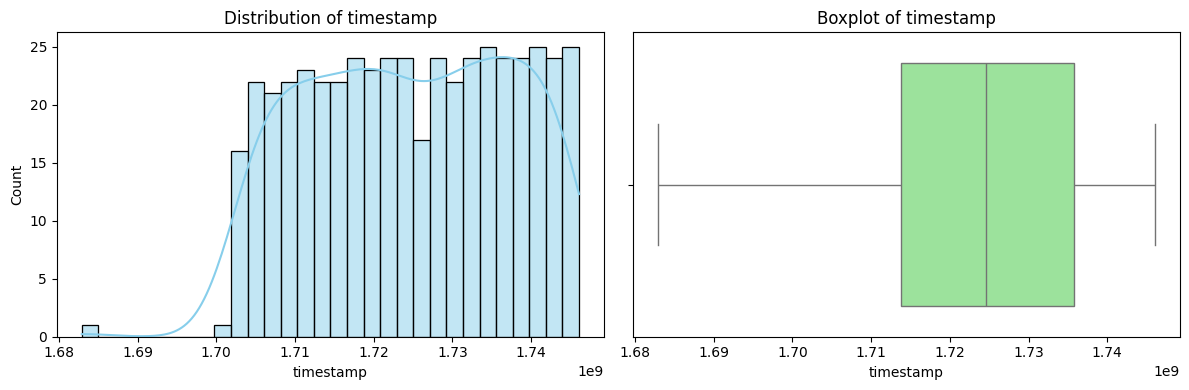

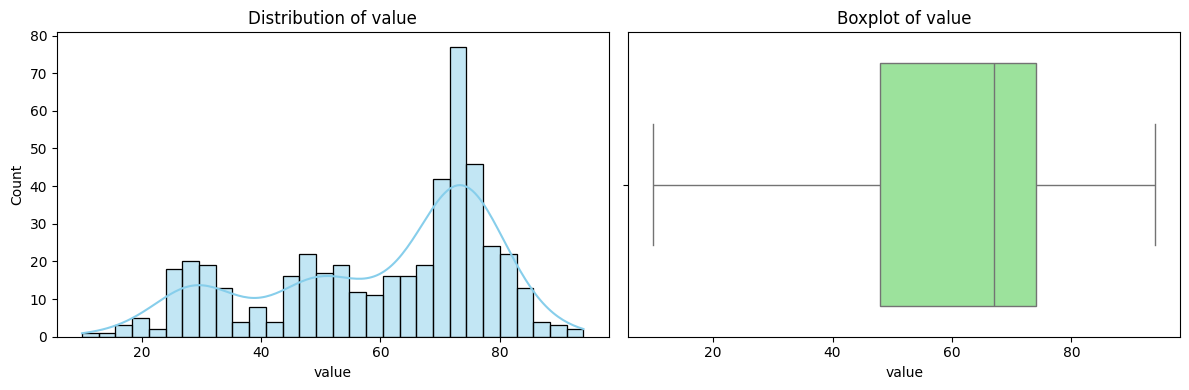

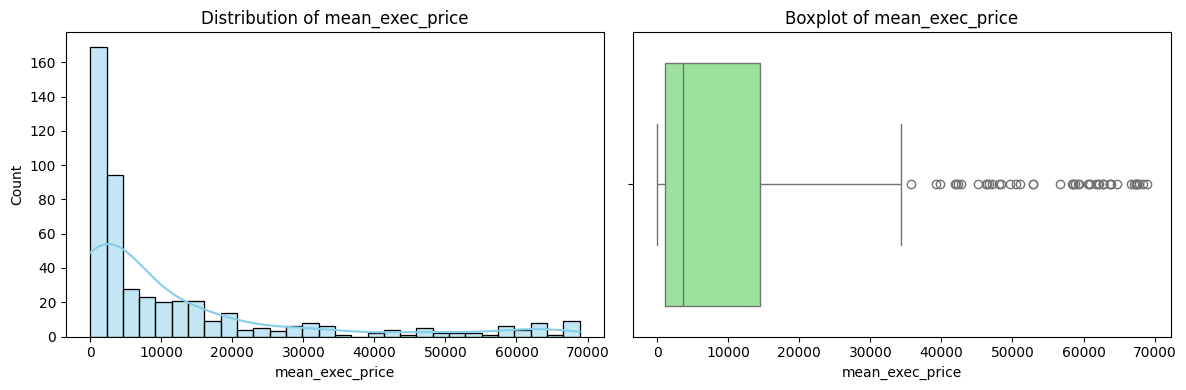

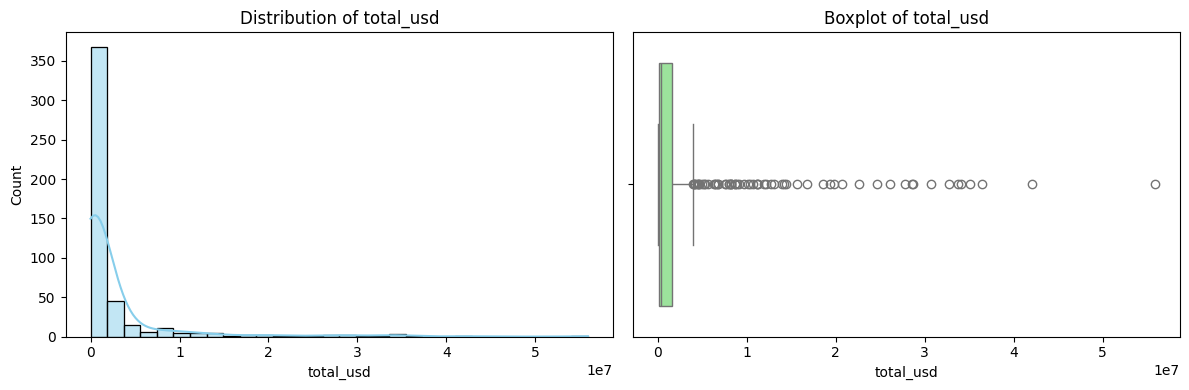

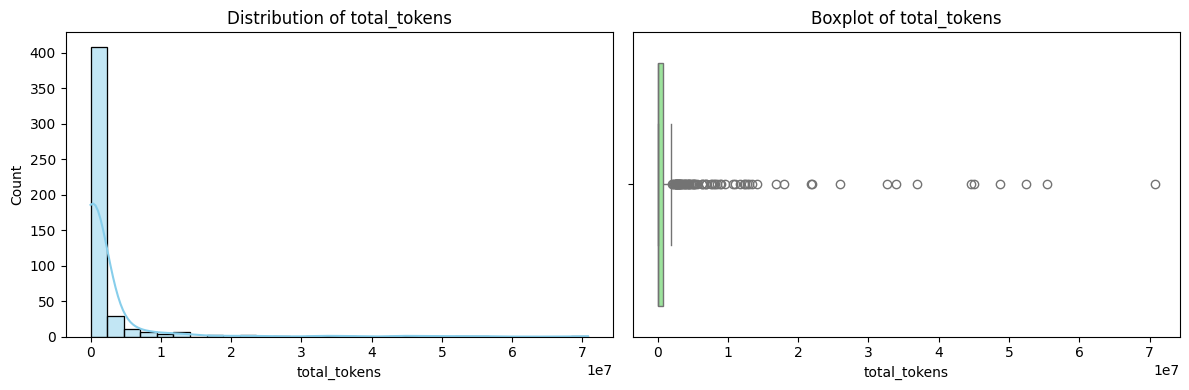

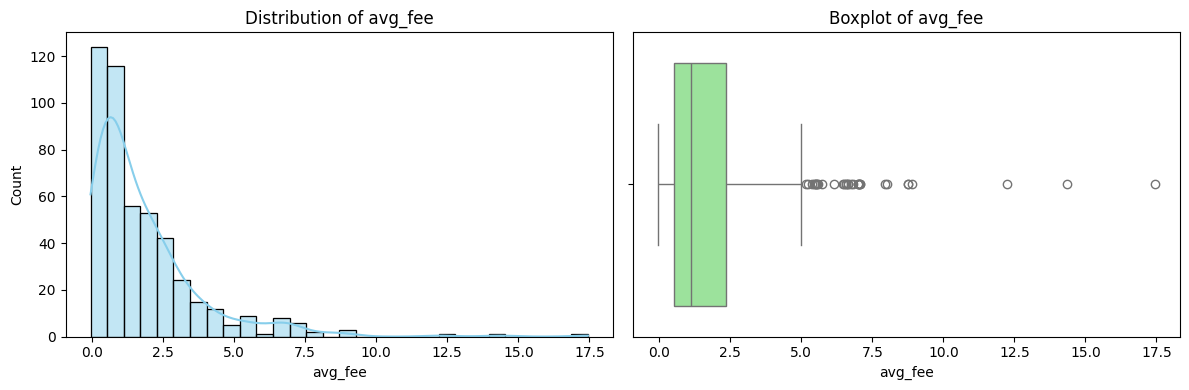

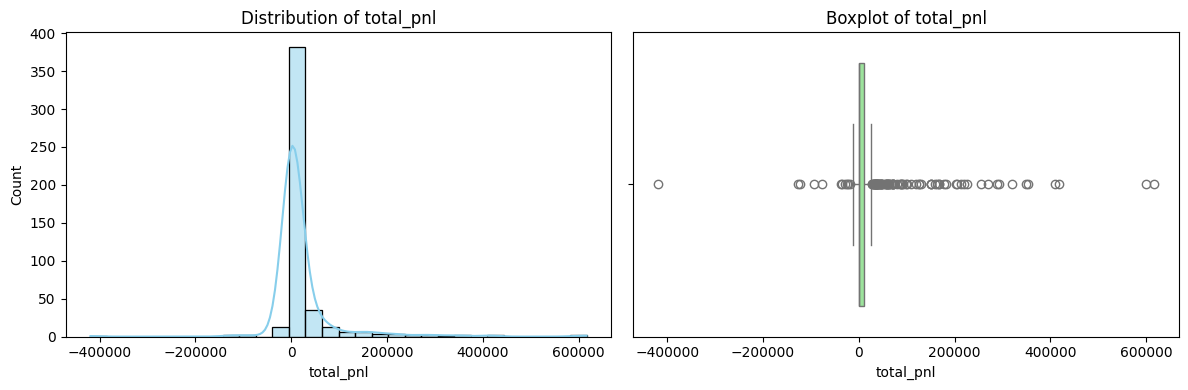

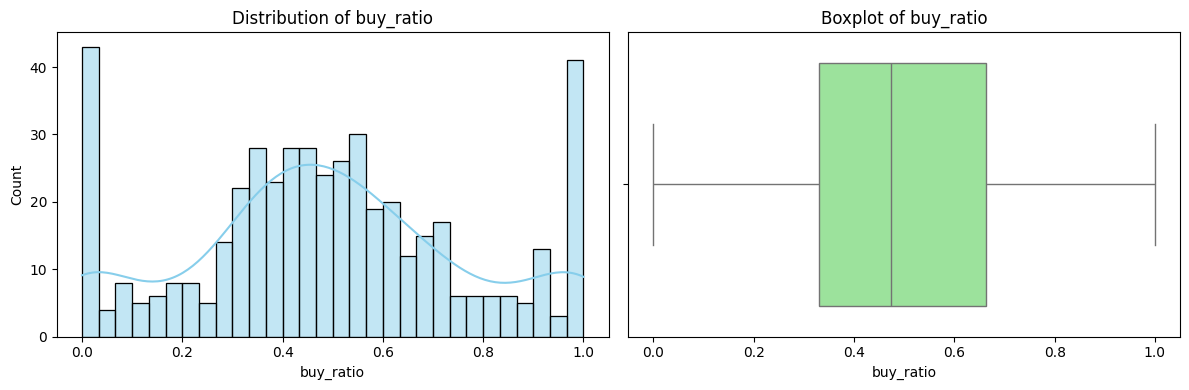

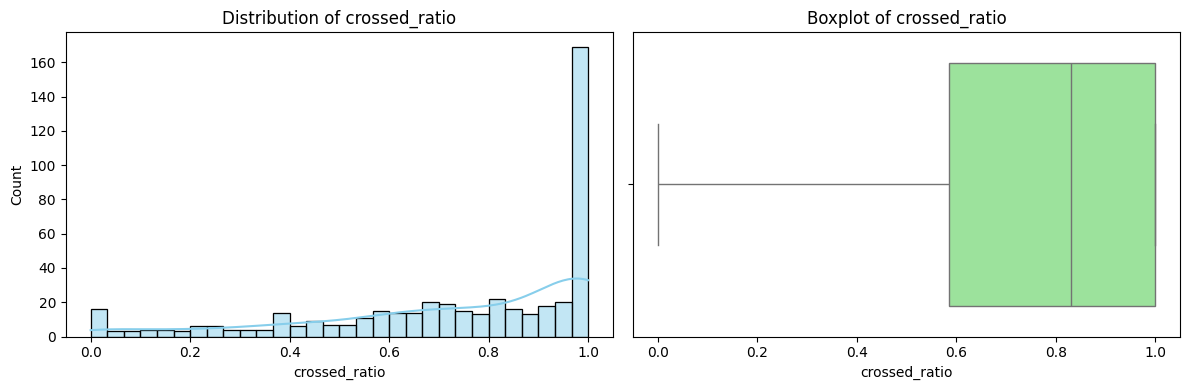

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Loop through each numeric column and plot histogram + boxplot side by side
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(df3[col], kde=True, bins=30, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=df3[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


## Note:
    Graphs made tHrough ploty express are not visible in  github. So pls open colab link provided in readme file

In [22]:

import plotly.express as px

fig = px.histogram(
    df3,
    x="classification",
    color="classification",   # color bars by sentiment
    text_auto=True,           # show counts on top of bars
    title="Distribution of Market Sentiment (Fear vs Greed)"
)

fig.update_layout(
    xaxis_title="Market Sentiment",
    yaxis_title="Number of Days",
    showlegend=False
)

fig.show()




In [23]:
# Boxplots of trader metrics across market sentiment categories.
#It helps us analyze how trader behavior (distribution, median, outliers) changes depending on market sentiment.

for col in numeric_cols:
    fig = px.box(
        df3,
        x="classification",
        y=col,
        category_orders={"classification": ["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"]},
        title=f"{col} by Sentiment Category",
        points="all",  # show individual data points (like swarm plot)
        color="classification"
    )
    fig.update_layout(
        xaxis_title="Market Sentiment",
        yaxis_title=col,
        xaxis_tickangle=30,
        showlegend=False
    )
    fig.show()

In [24]:
# Correlation heatmap of numeric trader metrics
# This shows how features like PnL, leverage, trade size, and fees relate to each other.
# Strong positive/negative correlations can indicate hidden patterns in trader behavior.

# lets computw correlation matrix
corr = df3[numeric_cols].corr().round(2)
fig = px.imshow(
    corr,
    text_auto=True,       # show correlation values
    color_continuous_scale="RdBu_r",
    title="Correlation Heatmap of Trader Metrics"
)
fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Metrics"
)
fig.show()

In [25]:
import os

# Path to save CSV
CSV_DIR = "/content/drive/MyDrive/ds_harsh_makadiya/csv_files"
os.makedirs(CSV_DIR, exist_ok=True)   # create folder if not exists

# Save df3 as CSV
df3.to_csv(f"{CSV_DIR}/df3.csv", index=False)

In [26]:
#identifying and handling outiler
# Function to detect outliers using the IQR rule
# Outliers are defined as values lying outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)   # 25th percentile
    Q3 = data[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                      # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Select rows where column value is outside the bounds
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#Detect and count outliers for all numeric columns
print("IQR-based Outliers per Numeric Column:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(df3, col)
    print(f"{col}: {len(outliers)} outliers")

IQR-based Outliers per Numeric Column:
timestamp: 0 outliers
value: 0 outliers
mean_exec_price: 48 outliers
total_usd: 62 outliers
total_tokens: 74 outliers
avg_fee: 33 outliers
total_pnl: 93 outliers
buy_ratio: 0 outliers
crossed_ratio: 0 outliers


In [27]:
# Function to cap outliers using the IQR method (winsorization)
# Any value outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR] is replaced with the boundary value.
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the IQR range
    data[column] = np.where(
        data[column] < lower_bound, lower_bound,
        np.where(data[column] > upper_bound, upper_bound, data[column])
    )
    return data

# Check outlier counts before capping
print("Before Capping Outlier Counts:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(df3, col)
    print(f"{col}: {len(outliers)} outliers")

# Apply capping to all numeric columns on a copy of df3
df = df3.copy()
for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

# Verify outlier counts after capping (should be close to 0)
print("\nAfter Capping Outlier Counts:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


Before Capping Outlier Counts:
timestamp: 0 outliers
value: 0 outliers
mean_exec_price: 48 outliers
total_usd: 62 outliers
total_tokens: 74 outliers
avg_fee: 33 outliers
total_pnl: 93 outliers
buy_ratio: 0 outliers
crossed_ratio: 0 outliers

After Capping Outlier Counts:
timestamp: 0 outliers
value: 0 outliers
mean_exec_price: 0 outliers
total_usd: 0 outliers
total_tokens: 0 outliers
avg_fee: 0 outliers
total_pnl: 0 outliers
buy_ratio: 0 outliers
crossed_ratio: 0 outliers


In [28]:
# boxplots comparing before vs after capping
for col in numeric_cols:
    temp = pd.DataFrame({
        "Before Capping": df3[col],
        "After Capping": df[col]
    }).melt(var_name="Dataset", value_name=col)

    fig = px.box(
        temp,
        x="Dataset",
        y=col,
        color="Dataset",
        title=f"Effect of Outlier Capping on {col}",
        points="outliers"
    )
    fig.show()



Profitability Analysis vs Sentiment

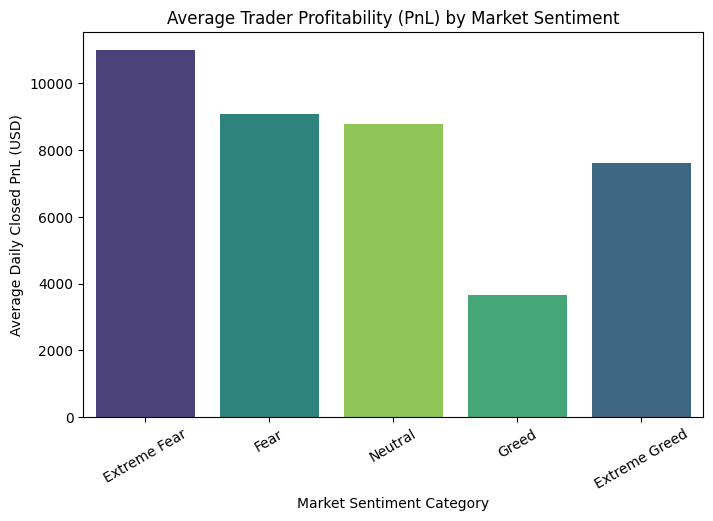

In [29]:
# Average Profitability by Sentiment
avg_pnl = df.groupby("classification")["total_pnl"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="total_pnl", data=avg_pnl,hue="classification",
            order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"],
            palette="viridis")

plt.title("Average Trader Profitability (PnL) by Market Sentiment")
plt.ylabel("Average Daily Closed PnL (USD)")
plt.xlabel("Market Sentiment Category")
plt.xticks(rotation=30)

# 🔹 Save plot to outputs folder
plt.savefig("/content/drive/MyDrive/ds_harsh_makadiya/outputs/avg_pnl_by_sentiment.png", bbox_inches="tight")
plt.show()


# Interpretation:

1. If PnL is higher in “Greed” or “Extreme Greed” →
Traders generally profit more when the market is optimistic.

    👉 Possible signal: momentum strategies work better in greedy markets.

2. If PnL is lower in “Fear” or “Extreme Fear” →
Traders lose more (or profit less) during fearful times.

    👉 Signal: fearful markets may punish aggressive trading.

3. If PnL is negative in Greed but positive in Fear →
That would suggest contrarian opportunities (most traders lose when greedy, but cautious trading in fear pays off).

Risk Analysis

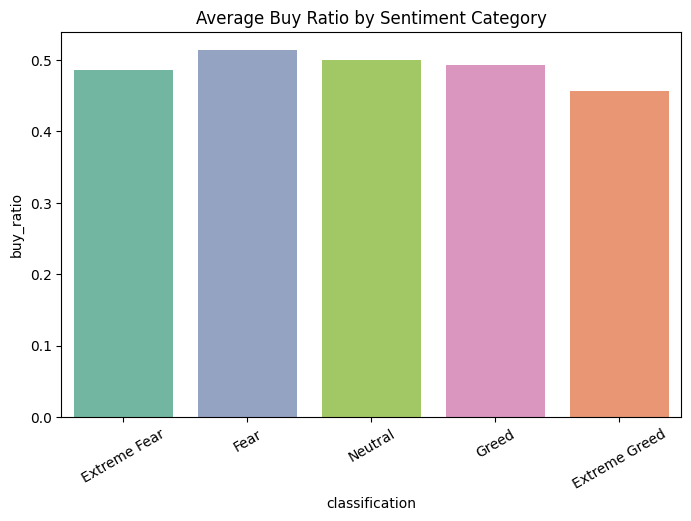

In [30]:
OUTPUT_DIR = "/content/drive/MyDrive/ds_harsh_makadiya/outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# A. Average Buy Ratio under each sentiment category
avg_buy_ratio = df.groupby("classification")["buy_ratio"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="buy_ratio", data=avg_buy_ratio,hue="classification",
            order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"],
            palette="Set2")
plt.title("Average Buy Ratio by Sentiment Category")
plt.xticks(rotation=30)
plt.savefig(f"{OUTPUT_DIR}/avg_buy_ratio_by_sentiment.png", bbox_inches="tight")
plt.show()

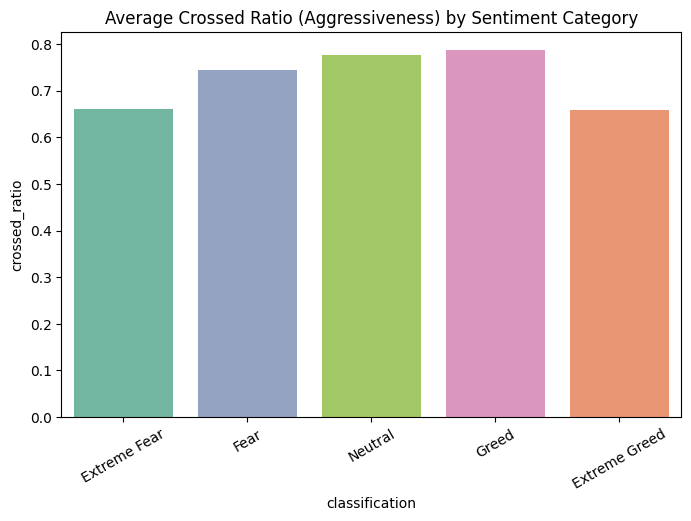

In [31]:
# B. Average Crossed Ratio under each sentiment category
avg_crossed_ratio = df.groupby("classification")["crossed_ratio"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="crossed_ratio", data=avg_crossed_ratio,hue="classification",
            order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"],
            palette="Set2")
plt.title("Average Crossed Ratio (Aggressiveness) by Sentiment Category")
plt.xticks(rotation=30)
plt.savefig(f"{OUTPUT_DIR}/avg_crossed_ratio_by_sentiment.png", bbox_inches="tight")
plt.show()

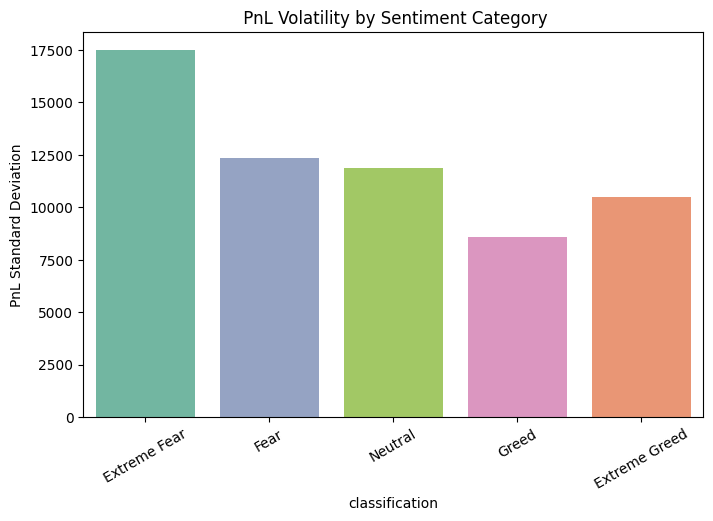

In [32]:
# C. Volatility of PnL under each sentiment category (std deviation)
pnl_volatility = df.groupby("classification")["total_pnl"].std().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="total_pnl", data=pnl_volatility,hue="classification",
            order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"],
            palette="Set2")
plt.title(" PnL Volatility by Sentiment Category")
plt.xticks(rotation=30)
plt.ylabel("PnL Standard Deviation")
plt.savefig(f"{OUTPUT_DIR}/pnl_volatility_by_sentiment.png", bbox_inches="tight")
plt.show()

Explanation of each chart:

*   Buy Ratio by Sentiment → tells us if traders go long more in greed vs fear.
*   Crossed Ratio by Sentiment → shows aggressiveness of trades (higher = more market orders).
* PnL Volatility by Sentiment → higher volatility = higher risk in that sentiment regime.











Hidden Trends / Trading Signals

In [33]:
#3: Generate insight summary from key metrics
insights = {
    "Profitability": avg_pnl.sort_values("total_pnl", ascending=False).iloc[0]["classification"],
    "Most Buying Bias": avg_buy_ratio.sort_values("buy_ratio", ascending=False).iloc[0]["classification"],
    "Most Risky (PnL Volatility)": pnl_volatility.sort_values("total_pnl", ascending=False).iloc[0]["classification"]
}

print("🔎 Key Insights from Trader Behavior vs Sentiment:\n")
for k, v in insights.items():
    print(f"👉 {k}: Traders peak during **{v}** markets")


🔎 Key Insights from Trader Behavior vs Sentiment:

👉 Profitability: Traders peak during **Extreme Fear** markets
👉 Most Buying Bias: Traders peak during **Fear** markets
👉 Most Risky (PnL Volatility): Traders peak during **Extreme Fear** markets


Interpretation of Insights

1. Profitability in Extreme Fear → Traders actually make the most money when the market is very fearful. This could mean that buying during dips (when others are scared) often pays off.

2. Buying Bias in Fear → Traders tend to place more buy trades when the market is fearful. They may see fear as a good chance to enter long positions at cheaper prices.

3. High Risk in Extreme Fear → Even though profits can be high, losses can also be big in fearful markets. The volatility of profits and losses is the highest in Extreme Fear, meaning outcomes are less predictable.

4. Traders are most profitable in Extreme Fear, but also face the highest volatility → meaning risk and reward are both amplified in panic markets.

In [34]:
# define ordered sentiment for consistent plots
sentiment_order = ["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"]

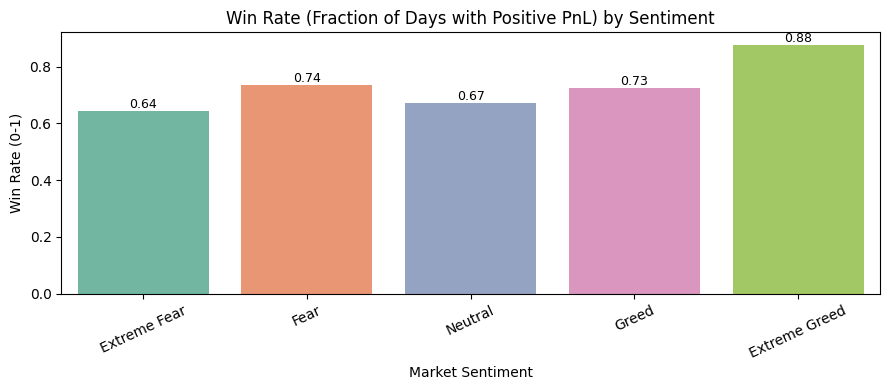

In [35]:
# A: Win-rate by sentiment
# For each sentiment category compute fraction of days with positive total_pnl (win days).
# This helps check whether the "average PnL" is driven by many winners or a few outliers.
OUTPUT_DIR2="/content/drive/MyDrive/ds_harsh_makadiya/csv_files"
win_rate = (
    df
    .assign(is_win = lambda d: d["total_pnl"] > 0)
    .groupby("classification")["is_win"]
    .mean()
    .reindex(sentiment_order)
    .reset_index()
    .rename(columns={"is_win":"win_rate"})
)

# Save numeric results
win_rate.to_csv(os.path.join(OUTPUT_DIR2, "win_rate_by_sentiment.csv"), index=False)

# Plot
plt.figure(figsize=(9,4))
ax = sns.barplot(x="classification", y="win_rate",hue="classification", data=win_rate, order=sentiment_order, palette="Set2")
ax.set_title("Win Rate (Fraction of Days with Positive PnL) by Sentiment")
ax.set_ylabel("Win Rate (0-1)")
ax.set_xlabel("Market Sentiment")
plt.xticks(rotation=25)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "win_rate_by_sentiment.png"), dpi=200, bbox_inches="tight")
plt.show()


*   So the  win-rate analysis shows that traders win more often in Extreme Greed (0.88 success rate).
*   But your average profitability analysis shows that profits are actually highest in Extreme Fear (despite lower win rate).
*   Traders win most often in Extreme Greed markets, but make the most money in Extreme Fear.
This means greedy markets are “safer” with many small wins, while fearful markets are “riskier” with fewer but larger wins (high risk, high reward).




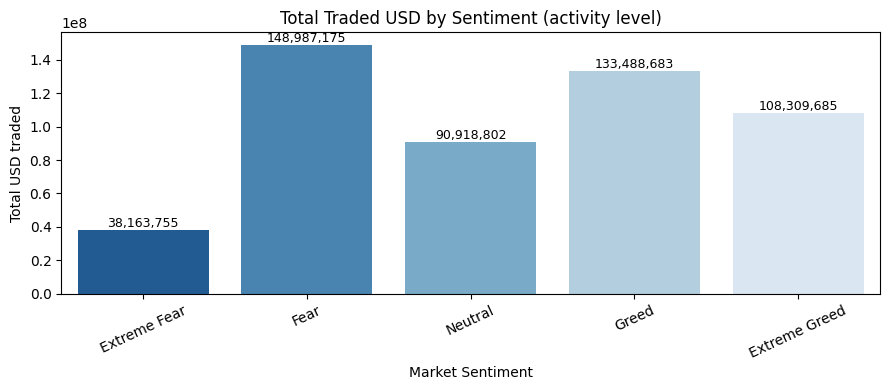

In [36]:
# B: Trade volume by sentiment (total USD)
# This shows whether trading activity increases during Fear or Greed (panic vs FOMO).
volume_by_sent = (
    df.groupby("classification")["total_usd"]
      .sum()
      .reindex(sentiment_order)
      .reset_index()
      .rename(columns={"total_usd":"sum_total_usd"})
)

# Save numeric results
volume_by_sent.to_csv(os.path.join(OUTPUT_DIR2, "volume_by_sentiment.csv"), index=False)

# Plot
plt.figure(figsize=(9,4))
ax = sns.barplot(x="classification", y="sum_total_usd",hue="classification", data=volume_by_sent, order=sentiment_order, palette="Blues_r")
ax.set_title("Total Traded USD by Sentiment (activity level)")
ax.set_ylabel("Total USD traded")
ax.set_xlabel("Market Sentiment")
plt.xticks(rotation=25)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "total_usd_by_sentiment.png"), dpi=200, bbox_inches="tight")
plt.show()


1. Highest Activity → Fear ($148.9M)

    When the market is in Fear, trading activity is at its highest.

    This suggests that investors are very active when worried, likely selling off assets or repositioning.

2. Second Highest → Greed ($133.5M)

    During Greed, activity is also strong but slightly lower than in Fear.

    People tend to trade more when they feel optimistic and chase gains.

3. Moderate Activity → Extreme Greed ($108.3M) and  Neutral ($90.9M)

    In Extreme Greed, trading volume is still healthy but lower than normal Greed or Fear.

    In Neutral conditions, activity is balanced and moderate.

4. Lowest Activity → Extreme Fear ($38.1M)

    Trading activity drops sharply during Extreme Fear.

    This shows traders hesitate, avoid risk, or freeze during panic situations.

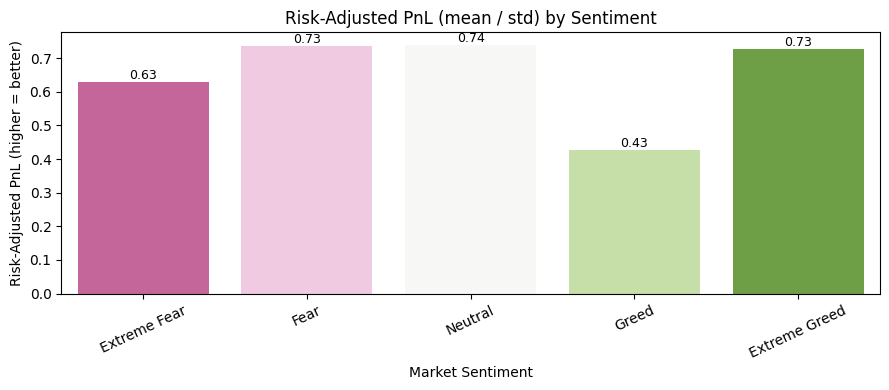

In [37]:
# C: Risk-adjusted return (mean/std) by sentiment — Sharpe-like metric
# Compute mean PnL and std PnL per sentiment then the ratio mean/std as a simple risk-adjusted measure.
pnl_stats = (
    df.groupby("classification")["total_pnl"]
      .agg(["mean","std"])
      .reindex(sentiment_order)
      .reset_index()
      .rename(columns={"mean":"pnl_mean","std":"pnl_std"})
)

# Avoid division by zero
pnl_stats["risk_adj"] = pnl_stats["pnl_mean"] / pnl_stats["pnl_std"].replace(0, np.nan)

# Save csv
pnl_stats.to_csv(os.path.join(OUTPUT_DIR2, "pnl_risk_adjusted_by_sentiment.csv"), index=False)

# Plot risk-adjusted metric
plt.figure(figsize=(9,4))
ax = sns.barplot(x="classification", y="risk_adj", data=pnl_stats,hue="classification", order=sentiment_order, palette="PiYG")
ax.set_title("Risk-Adjusted PnL (mean / std) by Sentiment")
ax.set_ylabel("Risk-Adjusted PnL (higher = better)")
ax.set_xlabel("Market Sentiment")
plt.xticks(rotation=25)
for p in ax.patches:
    val = p.get_height()
    ax.annotate(f"{val:.2f}" if not np.isnan(val) else "NaN", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "risk_adjusted_pnl_by_sentiment.png"), dpi=200, bbox_inches="tight")
plt.show()



Risk-Adjusted PnL Insights (Mean/Std by Sentiment)

    Neutral (0.74) → Best Environment
    Traders perform most efficiently in neutral markets. With emotions balanced, decisions are calmer, and profits are steady relative to risk.

    Fear (0.73) & Extreme Greed (0.73) → Surprisingly Strong
    Both regimes produce strong risk-adjusted returns.

    In Fear → cautious, disciplined trading often pays off.

    In Extreme Greed → momentum is strong, and disciplined traders capture it.

    Extreme Fear (0.63) → Moderate Performance
    Traders still make money, but panic-driven behavior reduces consistency.

    Greed (0.43) → Weakest Efficiency
    Traders win, but risk-adjusted returns are lowest. Overtrading and poor timing reduce efficiency.

In [38]:
# D: Direct comparison Extreme Fear vs Extreme Greed
sub = df[df["classification"].isin(["Extreme Fear","Extreme Greed"])]
comp = sub.groupby("classification").agg(
    mean_pnl = ("total_pnl","mean"),
    median_pnl = ("total_pnl","median"),
    win_rate = (lambda d: (d["total_pnl"]>0).mean()) if False else ("total_pnl", lambda x: (x>0).mean()),
    total_volume = ("total_usd","sum"),
    avg_buy_ratio = ("buy_ratio","mean"),
    pnl_std = ("total_pnl","std")
).reset_index()

# Note: pandas agg with mixed named lambdas can be tricky; build safely:
comp = sub.groupby("classification").apply(
    lambda g: pd.Series({
        "mean_pnl": g["total_pnl"].mean(),
        "median_pnl": g["total_pnl"].median(),
        "win_rate": (g["total_pnl"]>0).mean(),
        "total_volume": g["total_usd"].sum(),
        "avg_buy_ratio": g["buy_ratio"].mean(),
        "pnl_std": g["total_pnl"].std()
    })
).reset_index()

comp.to_csv(os.path.join(OUTPUT_DIR2, "extreme_fear_vs_greed_comparison.csv"), index=False)
print(comp)


/tmp/ipython-input-1329188077.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



  classification      mean_pnl    median_pnl  win_rate  total_volume  \
0   Extreme Fear  10986.520627  18581.357308  0.642857  3.816376e+07   
1  Extreme Greed   7624.537670   3127.536297  0.877193  1.083097e+08   

   avg_buy_ratio       pnl_std  
0       0.486538  17479.727318  
1       0.456803  10482.344988  


Key Takeaways

    Extreme Fear = “High Risk, High Reward” zone

    Low win rate, but big winners drive profitability.

    Low trading activity (only bold traders stay active).

    Extreme Greed = “Safe but smaller gains”

    Very high win rate, but profits per trade/day are lower.

    High participation due to optimism (FOMO).

    Lower volatility → safer but less explosive returns.

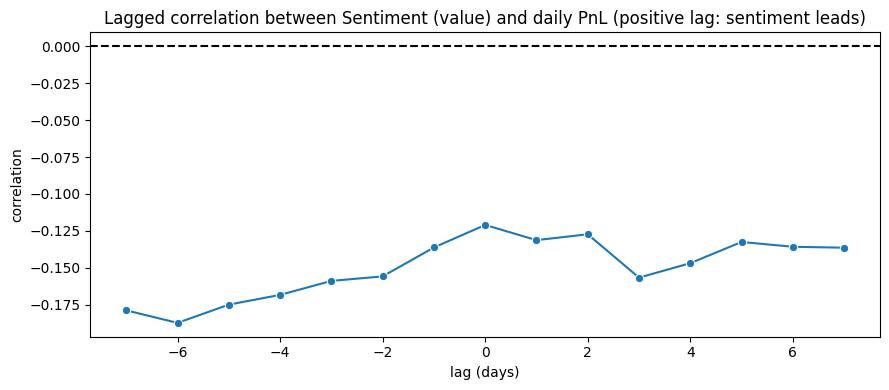

In [39]:
# E: Lagged correlation (sentiment -> next-day total_pnl)
# Use numeric sentiment score if available (column 'value'), otherwise encode classification.
if "value" in df.columns:
    df_ts = df.set_index(pd.to_datetime(df["date"]))
    s = df_ts["value"].astype(float)
    t = df_ts["total_pnl"].astype(float)
    # compute cross-correlations for lags  -7..+7 (sentiment lead positive lag)
    lags = range(-7,8)
    corr_vals = []
    for lag in lags:
        corr = s.corr(t.shift(-lag))   # shift negative means sentiment leads t by lag days
        corr_vals.append((lag, corr))
    lagdf = pd.DataFrame(corr_vals, columns=["lag","corr"])
    lagdf.to_csv(os.path.join(OUTPUT_DIR2, "lagged_corr_sentiment_pnl.csv"), index=False)

    # Plot
    plt.figure(figsize=(9,4))
    sns.lineplot(x="lag", y="corr", data=lagdf, marker="o")
    plt.axhline(0, color="k", linestyle="--")
    plt.title("Lagged correlation between Sentiment (value) and daily PnL (positive lag: sentiment leads)")
    plt.xlabel("lag (days)")
    plt.ylabel("correlation")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "lagged_correlation_sentiment_pnl.png"), dpi=200, bbox_inches="tight")
    plt.show()
else:
    print("No numeric 'value' sentiment column found — skip lagged analysis or encode classification numerically.")


**Key take aways**

Inverse relationship → Higher sentiment (optimism/greed) hurts performance; lower sentiment (fear) helps.

Lag effect → Sentiment doesn’t just reflect PnL, it also predicts weaker performance a few days ahead.

Trading Insight → Extreme optimism may be a contrarian signal for poor returns, while fear may be a buying opportunity.

In [40]:
# F: Summary table for report
summary_table = df.groupby("classification").agg(
    avg_pnl = ("total_pnl","mean"),
    median_pnl = ("total_pnl","median"),
    pnl_std = ("total_pnl","std"),
    win_rate = ("total_pnl", lambda x: (x>0).mean()),
    avg_buy_ratio = ("buy_ratio","mean"),
    avg_crossed_ratio = ("crossed_ratio","mean"),
    total_volume = ("total_usd","sum")
).reindex(sentiment_order).reset_index()

summary_table.to_csv(os.path.join(OUTPUT_DIR2, "sentiment_summary_table.csv"), index=False)
summary_table


,classification,avg_pnl,median_pnl,pnl_std,win_rate,avg_buy_ratio,avg_crossed_ratio,total_volume
0,Extreme Fear,10986.520627,18581.357308,17479.727318,0.642857,0.486538,0.661100,3.816376e+07
1,Fear,9080.373936,1412.314654,12356.386171,0.736264,0.513495,0.744839,1.489872e+08
2,Neutral,8768.833393,1818.573295,11860.944986,0.671642,0.499824,0.775396,9.091880e+07
3,Greed,3645.425609,678.475928,8571.305700,0.725389,0.493477,0.786212,1.334887e+08
4,Extreme Greed,7624.537670,3127.536297,10482.344988,0.877193,0.456803,0.657522,1.083097e+08


**Key Takeaways**

Extreme Fear = High risk, high reward → Low win rate, but huge profits when trades succeed.

Fear = Best mix of volume + profitability → Lots of trading activity with strong returns.

Neutral = Balanced performance → Steady profits and reasonable risk.

Greed = Worst profitability → Traders overtrade and get weaker returns despite heavy participation.

Extreme Greed = Safest (high win rate) → Traders succeed often, but profits are smaller.